In [ ]:
#importing basic libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

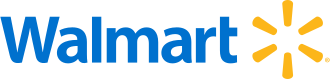




**Walmart is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States**

**The details of the walmart stores data are collected recently on April 25th 2022**

*   Each store is having store number, and its name is given in the data
*   Address, street, city , state and zip code of the stores is given.


In [ ]:
#importing walmart data
walmart= pd.read_csv('/content/Walmart_USA.csv.zip')
walmart.head(2)

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,...,Provider,Updated Date,Country,Status,Direction URL,NAICS 1,NAICS 2,SIC 1,SIC 2,Stock Ticker
0,4253,Sauk Centre Supercenter,45.720665,-94.947005,"205 12th St S, Sauk Centre, MN, 56378",205 12th St S,Sauk Centre,MN,56378,Stearns,...,Walmart,2022-04-25,USA,Open,https://www.google.com/maps/dir/Current+Locati...,452210 - Department Stores,452319 - All Other General Merchandise Stores,"53119901 - Department stores, discount",53310000 - Variety stores,WMT:NYSE
1,805,Fenton Supercenter,38.510098,-90.438772,"653 Gravois Bluffs Blvd, Fenton, MO, 63026",653 Gravois Bluffs Blvd,Fenton,MO,63026,St. Louis,...,Walmart,2022-04-25,USA,Open,https://www.google.com/maps/dir/Current+Locati...,452210 - Department Stores,452319 - All Other General Merchandise Stores,"53119901 - Department stores, discount",53310000 - Variety stores,WMT:NYSE


### **Analysis for walmart Store data**

### Data Cleaning process

In [ ]:
walmart.columns

Index(['Store No.', 'Name', 'Latitude', 'Longitude', 'Address', 'Street',
       'City', 'State', 'Zip_Code', 'County', 'Phone', 'Open Hours', 'URL',
       'Provider', 'Updated Date', 'Country', 'Status', 'Direction URL',
       'NAICS 1', 'NAICS 2', 'SIC 1', 'SIC 2', 'Stock Ticker'],
      dtype='object')

**some of the column names are not in proper order we need to rearrage them by adding new names in a dictionary. here the key will  be old variable names and values in the dictionary is new name.**

In [ ]:
#renaming the variable name
walmart.rename(columns= {'Store No.':'Store_No', 'Open Hours':'Open_Hours', 'Updated Date':'Updated_Date', 'Direction URL':'URL', 'NAICS 1':'NAICS_1', 'NAICS 2':'NAICS_2', 'SIC 1':'SIC_1', 'SIC 2':'SIC_2', 'Stock Ticker':'Stock_Ticker'}, inplace=True)

In [ ]:
walmart.columns

Index(['Store_No', 'Name', 'Latitude', 'Longitude', 'Address', 'Street',
       'City', 'State', 'Zip_Code', 'County', 'Phone', 'Open_Hours', 'URL',
       'Provider', 'Updated_Date', 'Country', 'Status', 'URL', 'NAICS_1',
       'NAICS_2', 'SIC_1', 'SIC_2', 'Stock_Ticker'],
      dtype='object')

In [ ]:
walmart.shape

(4666, 23)

**The data contains 4666 rows and 23 columns**

In [ ]:
walmart.duplicated().sum()

0

**Their is no duplicate values in the data.**

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_No      4666 non-null   int64  
 1   Name          4666 non-null   object 
 2   Latitude      4666 non-null   float64
 3   Longitude     4666 non-null   float64
 4   Address       4666 non-null   object 
 5   Street        4666 non-null   object 
 6   City          4666 non-null   object 
 7   State         4666 non-null   object 
 8   Zip_Code      4666 non-null   int64  
 9   County        4666 non-null   object 
 10  Phone         4666 non-null   object 
 11  Open_Hours    4660 non-null   object 
 12  URL           4666 non-null   object 
 13  Provider      4666 non-null   object 
 14  Updated_Date  4666 non-null   object 
 15  Country       4666 non-null   object 
 16  Status        4666 non-null   object 
 17  URL           4666 non-null   object 
 18  NAICS_1       4666 non-null 

In [ ]:
#to take the count of null values of each variables
walmart.isna().sum()

Store_No        0
Name            0
Latitude        0
Longitude       0
Address         0
Street          0
City            0
State           0
Zip_Code        0
County          0
Phone           0
Open_Hours      6
URL             0
Provider        0
Updated_Date    0
Country         0
Status          0
URL             0
NAICS_1         0
NAICS_2         0
SIC_1           0
SIC_2           0
Stock_Ticker    0
dtype: int64

**The address is already splitted into seperate variables so we dont need the address column in the data we can remove it.**

**Also we are removing the updated date column from the data**

**there is no much use with some of the variables of the data so we can remove those variables** 

In [ ]:
walmart.drop(['Address','Updated_Date', 'Country','URL','Phone', 'Provider', 'Zip_Code', 'Store_No'], axis=1, inplace=True)

In [ ]:
walmart.shape

(4666, 14)

In [ ]:
walmart.head(2)

,Name,Latitude,Longitude,Street,City,State,County,Open_Hours,Status,NAICS_1,NAICS_2,SIC_1,SIC_2,Stock_Ticker
0,Sauk Centre Supercenter,45.720665,-94.947005,205 12th St S,Sauk Centre,MN,Stearns,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open,452210 - Department Stores,452319 - All Other General Merchandise Stores,"53119901 - Department stores, discount",53310000 - Variety stores,WMT:NYSE
1,Fenton Supercenter,38.510098,-90.438772,653 Gravois Bluffs Blvd,Fenton,MO,St. Louis,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open,452210 - Department Stores,452319 - All Other General Merchandise Stores,"53119901 - Department stores, discount",53310000 - Variety stores,WMT:NYSE


In [ ]:
walmart['Stock_Ticker'].value_counts()

WMT:NYSE    4666
Name: Stock_Ticker, dtype: int64

In [ ]:
walmart['NAICS_1'].value_counts()

452210 - Department Stores    4666
Name: NAICS_1, dtype: int64

In [ ]:
walmart['NAICS_2'].value_counts()

452319 - All Other General Merchandise Stores    4666
Name: NAICS_2, dtype: int64

In [ ]:
walmart['SIC_1'].value_counts()

53119901 - Department stores, discount    4666
Name: SIC_1, dtype: int64

In [ ]:
walmart['SIC_2'].value_counts()

53310000 - Variety stores    4666
Name: SIC_2, dtype: int64

**All the Stores having NAICS and SIC codes same, so we are going to eliminate those variables..**

In [ ]:
walmart.drop(['NAICS_1',	'NAICS_2',	'SIC_1',	'SIC_2',	'Stock_Ticker'], axis=1, inplace=True)

In [ ]:
walmart.shape

(4666, 9)

In [ ]:
walmart.head(3)

,Name,Latitude,Longitude,Street,City,State,County,Open_Hours,Status
0,Sauk Centre Supercenter,45.720665,-94.947005,205 12th St S,Sauk Centre,MN,Stearns,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open
1,Fenton Supercenter,38.510098,-90.438772,653 Gravois Bluffs Blvd,Fenton,MO,St. Louis,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open
2,Gadsden Supercenter,34.012769,-85.987031,340 E Meighan Blvd,Gadsden,AL,Etowah,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open


**Here in next codes we are going to dividenthe hours**

In [ ]:
walmart.Open_Hours.head(11)

0     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
1     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
2     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
3     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
4     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
5     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
6     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
7     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
8     sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
9                                                   NaN
10    sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...
Name: Open_Hours, dtype: object

In [ ]:
walmart['Open_Hours'].str.split('|')

0       [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
1       [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
2       [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
3       [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
4       [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
                              ...                        
4661    [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
4662    [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
4663    [sunday :- 06:00 - 23:00 ,  monday :- 06:00 - ...
4664    [sunday :- 07:00 - 19:00 ,  monday :- 07:00 - ...
4665    [sunday :- 07:00 - 19:00 ,  monday :- 07:00 - ...
Name: Open_Hours, Length: 4666, dtype: object

In [ ]:
walmart['Sunday']=walmart['Open_Hours'].str.split('|').str[0]
walmart['Monday']=walmart['Open_Hours'].str.split('|').str[1]
walmart['Tuesday']=walmart['Open_Hours'].str.split('|').str[2]
walmart['Wednesday']=walmart['Open_Hours'].str.split('|').str[3]
walmart['Thursday']=walmart['Open_Hours'].str.split('|').str[4]
walmart['Friday']=walmart['Open_Hours'].str.split('|').str[5]
walmart['Saturday']=walmart['Open_Hours'].str.split('|').str[6]

In [ ]:
walmart.head(2)

,Name,Latitude,Longitude,Street,City,State,County,Open_Hours,Status,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,Sauk Centre Supercenter,45.720665,-94.947005,205 12th St S,Sauk Centre,MN,Stearns,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open,sunday :- 06:00 - 23:00,monday :- 06:00 - 23:00,tuesday :- 06:00 - 23:00,wednesday :- 06:00 - 23:00,thursday :- 06:00 - 23:00,friday :- 06:00 - 23:00,saturday :- 06:00 - 23:00
1,Fenton Supercenter,38.510098,-90.438772,653 Gravois Bluffs Blvd,Fenton,MO,St. Louis,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open,sunday :- 06:00 - 23:00,monday :- 06:00 - 23:00,tuesday :- 06:00 - 23:00,wednesday :- 06:00 - 23:00,thursday :- 06:00 - 23:00,friday :- 06:00 - 23:00,saturday :- 06:00 - 23:00


In [ ]:
walmart['Sunday'].str.split(':-')
walmart['Monday'].str.split(':-')
walmart['Tuesday'].str.split(':-')
walmart['Wednesday'].str.split(':-')
walmart['Thursday'].str.split(':-')
walmart['Friday'].str.split(':-')
walmart['Saturday'].str.split(':-')

0       [ saturday ,  06:00 - 23:00]
1       [ saturday ,  06:00 - 23:00]
2       [ saturday ,  06:00 - 23:00]
3       [ saturday ,  06:00 - 23:00]
4       [ saturday ,  06:00 - 23:00]
                    ...             
4661    [ saturday ,  06:00 - 23:00]
4662    [ saturday ,  06:00 - 23:00]
4663    [ saturday ,  06:00 - 23:00]
4664    [ saturday ,  07:00 - 19:00]
4665    [ saturday ,  07:00 - 19:00]
Name: Saturday, Length: 4666, dtype: object

In [ ]:
walmart['Sunday_Hours']=walmart['Sunday'].str.split(':-').str[1]
walmart['Monday_Hours']=walmart['Monday'].str.split(':-').str[1]
walmart['Tuesday_Hours']=walmart['Tuesday'].str.split(':-').str[1]
walmart['Wednesday_Hours']=walmart['Wednesday'].str.split(':-').str[1]
walmart['Thursday_Hours']=walmart['Thursday'].str.split(':-').str[1]
walmart['Friday_Hours']=walmart['Friday'].str.split(':-').str[1]
walmart['Saturday_Hours']=walmart['Saturday'].str.split(':-').str[1]

In [ ]:
walmart.head(2)

,Name,Latitude,Longitude,Street,City,State,County,Open_Hours,Status,Sunday,...,Thursday,Friday,Saturday,Sunday_Hours,Monday_Hours,Tuesday_Hours,Wednesday_Hours,Thursday_Hours,Friday_Hours,Saturday_Hours
0,Sauk Centre Supercenter,45.720665,-94.947005,205 12th St S,Sauk Centre,MN,Stearns,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open,sunday :- 06:00 - 23:00,...,thursday :- 06:00 - 23:00,friday :- 06:00 - 23:00,saturday :- 06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00
1,Fenton Supercenter,38.510098,-90.438772,653 Gravois Bluffs Blvd,Fenton,MO,St. Louis,sunday :- 06:00 - 23:00 | monday :- 06:00 - 23...,Open,sunday :- 06:00 - 23:00,...,thursday :- 06:00 - 23:00,friday :- 06:00 - 23:00,saturday :- 06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00


In [ ]:
walmart.columns

Index(['Name', 'Latitude', 'Longitude', 'Street', 'City', 'State', 'County',
       'Open_Hours', 'Status', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday_Hours', 'Monday_Hours',
       'Tuesday_Hours', 'Wednesday_Hours', 'Thursday_Hours', 'Friday_Hours',
       'Saturday_Hours'],
      dtype='object')

In [ ]:
walmart.drop(['Open_Hours','Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday'], axis=1, inplace=True)

In [ ]:
walmart.head(2)

,Name,Latitude,Longitude,Street,City,State,County,Status,Sunday_Hours,Monday_Hours,Tuesday_Hours,Wednesday_Hours,Thursday_Hours,Friday_Hours,Saturday_Hours
0,Sauk Centre Supercenter,45.720665,-94.947005,205 12th St S,Sauk Centre,MN,Stearns,Open,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00
1,Fenton Supercenter,38.510098,-90.438772,653 Gravois Bluffs Blvd,Fenton,MO,St. Louis,Open,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00,06:00 - 23:00


In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4666 non-null   object 
 1   Latitude         4666 non-null   float64
 2   Longitude        4666 non-null   float64
 3   Street           4666 non-null   object 
 4   City             4666 non-null   object 
 5   State            4666 non-null   object 
 6   County           4666 non-null   object 
 7   Status           4666 non-null   object 
 8   Sunday_Hours     4660 non-null   object 
 9   Monday_Hours     4660 non-null   object 
 10  Tuesday_Hours    4660 non-null   object 
 11  Wednesday_Hours  4660 non-null   object 
 12  Thursday_Hours   4660 non-null   object 
 13  Friday_Hours     4655 non-null   object 
 14  Saturday_Hours   4652 non-null   object 
dtypes: float64(2), object(13)
memory usage: 546.9+ KB


**inside this data their is null values in Hours of each day so by checking the percentage we need to fill the hours to clean the data**..\
 

In [ ]:
walmart.isnull().sum()

Name                0
Latitude            0
Longitude           0
Street              0
City                0
State               0
County              0
Status              0
Sunday_Hours        6
Monday_Hours        6
Tuesday_Hours       6
Wednesday_Hours     6
Thursday_Hours      6
Friday_Hours       11
Saturday_Hours     14
dtype: int64

In [ ]:
walmart.shape[0]

4666

In [ ]:
#Sunday Hours Splitting

# so we have 4666 number of rows, out of which only 6 columns are missing, so lets calculate the ratio for sunday_hours
walmart.Sunday_Hours.isnull().sum()/walmart.shape[0]

0.0012858979854264896

In [ ]:
100*(walmart.Sunday_Hours.isnull().sum()/walmart.shape[0])

0.12858979854264896

**This is quite high, so we can't delete it, in such case we have to handle to the missing values by replacing with some values.**

In [ ]:
walmart.Sunday_Hours.mode()

0     06:00 - 23:00 
dtype: object

In [ ]:
Sunday_Hours_mode=walmart.Sunday_Hours.mode()
Sunday_Hours_mode

0     06:00 - 23:00 
dtype: object

In [ ]:
Sunday_Hours_mode[0]

' 06:00 - 23:00 '

In [ ]:
walmart.Sunday_Hours.fillna(Sunday_Hours_mode[0],inplace=True)
walmart.Sunday_Hours.value_counts(normalize=True)

 06:00 - 23:00     0.912773
 07:00 - 23:00     0.047150
 06:00 - 22:00     0.025075
 07:00 - 22:00     0.003000
 07:00 - 19:00     0.001500
 06:00 - 21:00     0.001286
 07:00 - 20:30     0.001072
 07:00 - 21:00     0.001072
 06:00 - 20:00     0.000857
 06:00 - 00:00     0.000643
 08:00 - 22:00     0.000643
 07:00 - 20:00     0.000643
 09:00 - 17:30     0.000429
 08:00 - 19:00     0.000429
 09:00 - 20:30     0.000429
 08:00 - 21:00     0.000429
 08:00 - 23:00     0.000429
 06:00 - 22:30     0.000214
 06:00 - 20:30     0.000214
 08:00 - 19:30     0.000214
 08:00 - 20:00     0.000214
 07:00 - 21:30     0.000214
 05:45 - 23:15     0.000214
 07:00 - 18:15     0.000214
 05:00 - 23:00     0.000214
 08:00 - 18:00     0.000214
 07:30 - 20:30     0.000214
Name: Sunday_Hours, dtype: float64

In [ ]:
walmart.Sunday_Hours.isnull().sum()
# so finally the null values of the Sunday Hours is filled by mode values.

0

In [ ]:
#Monday Hours Splitting

100*(walmart.Monday_Hours.isnull().sum()/walmart.shape[0])
#the percentage of null values is high in Monday hours so we need to replace null values by most repeated value

0.12858979854264896

In [ ]:
walmart.Monday_Hours.mode()

0     06:00 - 23:00 
dtype: object

In [ ]:
Monday_Hours_mode=walmart.Monday_Hours.mode()
Monday_Hours_mode

0     06:00 - 23:00 
dtype: object

In [ ]:
Monday_Hours_mode[0]

' 06:00 - 23:00 '

In [ ]:
walmart.Monday_Hours.fillna(Monday_Hours_mode[0],inplace=True)
walmart.Monday_Hours.value_counts(normalize=True)

 06:00 - 23:00     0.913416
 07:00 - 23:00     0.047150
 06:00 - 22:00     0.025504
 07:00 - 22:00     0.003429
 07:00 - 19:00     0.001500
 07:00 - 20:30     0.001072
 07:00 - 21:00     0.001072
 06:00 - 20:00     0.000857
 06:00 - 21:00     0.000643
 08:00 - 23:00     0.000429
 09:00 - 17:30     0.000429
 08:00 - 19:00     0.000429
 09:00 - 20:30     0.000429
 06:00 - 18:00     0.000429
 06:00 - 22:30     0.000214
 08:00 - 22:00     0.000214
 06:00 - 20:30     0.000214
 08:00 - 21:00     0.000214
 06:00 - 17:30     0.000214
 10:00 - 19:30     0.000214
 08:00 - 20:00     0.000214
 07:00 - 21:30     0.000214
 06:00 - 10:00     0.000214
 05:45 - 23:15     0.000214
 07:00 - 18:15     0.000214
 05:00 - 23:00     0.000214
 07:00 - 20:00     0.000214
 08:00 - 18:00     0.000214
 07:30 - 20:30     0.000214
Name: Monday_Hours, dtype: float64

In [ ]:
walmart.Monday_Hours.isnull().sum()

0

In [ ]:
#Filling Tuesday Hours

100*(walmart.Tuesday_Hours.isnull().sum()/walmart.shape[0])
#the percentage of null values is high in Tuesady hours so we need to replace null values by most repeated value

0.12858979854264896

In [ ]:
walmart.Tuesday_Hours.mode()

0     06:00 - 23:00 
dtype: object

In [ ]:
Tuesday_Hours_mode=walmart.Tuesday_Hours.mode()
Tuesday_Hours_mode

0     06:00 - 23:00 
dtype: object

In [ ]:
Tuesday_Hours_mode[0]

' 06:00 - 23:00 '

In [ ]:
walmart.Tuesday_Hours.fillna(Tuesday_Hours_mode[0],inplace=True)
walmart.Tuesday_Hours.value_counts(normalize=True)

 06:00 - 23:00     0.902486
 07:00 - 23:00     0.057437
 06:00 - 22:00     0.025932
 07:00 - 22:00     0.003429
 07:00 - 19:00     0.001500
 07:00 - 20:30     0.001286
 07:00 - 21:00     0.001072
 06:00 - 20:00     0.000857
 06:00 - 21:00     0.000643
 08:00 - 23:00     0.000429
 09:00 - 17:30     0.000429
 08:00 - 19:00     0.000429
 09:00 - 20:30     0.000429
 07:00 - 18:00     0.000429
 06:00 - 22:30     0.000214
 08:00 - 22:00     0.000214
 08:00 - 21:00     0.000214
 07:00 - 17:30     0.000214
 10:00 - 19:30     0.000214
 08:00 - 20:00     0.000214
 12:30 - 23:00     0.000214
 07:00 - 21:30     0.000214
 06:00 - 23:15     0.000214
 07:00 - 18:15     0.000214
 06:00 - 11:00     0.000214
 05:00 - 23:00     0.000214
 07:00 - 20:00     0.000214
 08:00 - 18:00     0.000214
 07:30 - 20:30     0.000214
Name: Tuesday_Hours, dtype: float64

In [ ]:
walmart.Tuesday_Hours.isnull().sum()

0

In [ ]:
#filling Wednesday Hours

100*(walmart.Wednesday_Hours.isnull().sum()/walmart.shape[0])
#the percentage of null values is high in Wednesday hours so we need to replace null values by most repeated value

0.12858979854264896

In [ ]:
walmart.Wednesday_Hours.mode()

0     06:00 - 23:00 
dtype: object

In [ ]:
Wednesday_Hours_mode=walmart.Wednesday_Hours.mode()
Wednesday_Hours_mode

0     06:00 - 23:00 
dtype: object

In [ ]:
Wednesday_Hours_mode[0]

' 06:00 - 23:00 '

In [ ]:
walmart.Wednesday_Hours.fillna(Wednesday_Hours_mode[0],inplace=True)
walmart.Wednesday_Hours.value_counts(normalize=True)

 06:00 - 23:00     0.913416
 07:00 - 23:00     0.047150
 06:00 - 22:00     0.025718
 07:00 - 22:00     0.003429
 07:00 - 19:00     0.001500
 07:00 - 20:30     0.001072
 07:00 - 21:00     0.001072
 06:00 - 20:00     0.000857
 06:00 - 21:00     0.000643
 08:00 - 23:00     0.000429
 09:00 - 17:30     0.000429
 08:00 - 19:00     0.000429
 09:00 - 20:30     0.000429
 06:00 - 18:00     0.000429
 06:00 - 22:30     0.000214
 08:00 - 22:00     0.000214
 06:00 - 20:30     0.000214
 08:00 - 21:00     0.000214
 06:00 - 17:30     0.000214
 10:00 - 19:30     0.000214
 08:00 - 20:00     0.000214
 07:00 - 21:30     0.000214
 05:45 - 23:15     0.000214
 07:00 - 18:15     0.000214
 05:00 - 23:00     0.000214
 07:00 - 20:00     0.000214
 08:00 - 18:00     0.000214
 07:30 - 20:30     0.000214
Name: Wednesday_Hours, dtype: float64

In [ ]:
walmart.Wednesday_Hours.isnull().sum()

0

In [ ]:
#filling Thursday Hours

100*(walmart.Thursday_Hours.isnull().sum()/walmart.shape[0])
#the percentage of null values is high in Thursday hours so we need to replace null values by most repeated value

0.12858979854264896

In [ ]:
walmart.Thursday_Hours.mode()

0     06:00 - 23:00 
dtype: object

In [ ]:
Thursday_Hours_mode=walmart.Thursday_Hours.mode()
Thursday_Hours_mode

0     06:00 - 23:00 
dtype: object

In [ ]:
Thursday_Hours_mode[0]

' 06:00 - 23:00 '

In [ ]:
walmart.Thursday_Hours.fillna(Thursday_Hours_mode[0],inplace=True)
walmart.Thursday_Hours.value_counts(normalize=True)

 06:00 - 23:00     0.912345
 07:00 - 23:00     0.047150
 06:00 - 22:00     0.025932
 07:00 - 22:00     0.003429
 07:00 - 19:00     0.001500
 07:00 - 20:30     0.001072
 07:00 - 21:00     0.001072
 06:00 - 18:00     0.000857
 06:00 - 20:00     0.000857
 06:00 - 21:00     0.000643
 08:00 - 19:00     0.000429
 06:00 - 19:00     0.000429
 08:00 - 23:00     0.000429
 09:00 - 17:30     0.000429
 09:00 - 20:30     0.000429
 10:00 - 17:30     0.000214
 08:00 - 18:00     0.000214
 07:00 - 20:00     0.000214
 05:00 - 23:00     0.000214
 05:45 - 23:15     0.000214
 07:00 - 21:30     0.000214
 06:00 - 17:30     0.000214
 08:00 - 21:00     0.000214
 07:00 - 18:15     0.000214
 08:00 - 20:00     0.000214
 06:00 - 22:30     0.000214
 08:00 - 22:00     0.000214
 06:00 - 20:30     0.000214
 07:30 - 20:30     0.000214
Name: Thursday_Hours, dtype: float64

In [ ]:
walmart.Thursday_Hours.isnull().sum()

0

In [ ]:
#filling Friday Hours

100*(walmart.Friday_Hours.isnull().sum()/walmart.shape[0])
#the percentage of null values is high in Friday hours so we need to replace null values by most repeated value

0.23574796399485642

In [ ]:
walmart.Friday_Hours.mode()

0     06:00 - 23:00 
dtype: object

In [ ]:
Friday_Hours_mode=walmart.Friday_Hours.mode()
Friday_Hours_mode

0     06:00 - 23:00 
dtype: object

In [ ]:
Friday_Hours_mode[0]

' 06:00 - 23:00 '

In [ ]:
walmart.Friday_Hours.fillna(Friday_Hours_mode[0],inplace=True)
walmart.Friday_Hours.value_counts(normalize=True)

 06:00 - 23:00     0.914059
 07:00 - 23:00     0.047150
 06:00 - 22:00     0.025932
 07:00 - 22:00     0.003429
 07:00 - 19:00     0.001072
 07:00 - 20:30     0.001072
 07:00 - 21:00     0.001072
 06:00 - 20:00     0.000857
 06:00 - 18:00     0.000643
 06:00 - 21:00     0.000643
 08:00 - 23:00     0.000429
 09:00 - 20:30     0.000429
 08:00 - 19:00     0.000429
 07:00 - 20:00     0.000214
 05:00 - 23:00     0.000214
 05:45 - 23:15     0.000214
 07:00 - 21:30     0.000214
 08:00 - 21:00     0.000214
 06:00 - 17:30     0.000214
 06:00 - 20:30     0.000214
 07:00 - 19:00     0.000214
 14:00 - 17:00     0.000214
 06:00 - 22:30     0.000214
 08:00 - 22:00     0.000214
 08:00 - 20:00     0.000214
 09:00 - 13:00     0.000214
Name: Friday_Hours, dtype: float64

In [ ]:
walmart.Friday_Hours.isnull().sum()

0

In [ ]:
#filling Saturday Hours

100*(walmart.Saturday_Hours.isnull().sum()/walmart.shape[0])
#the percentage of null values is high in Saturday hours so we need to replace null values by most repeated value

0.30004286326618085

In [ ]:
walmart.Saturday_Hours.mode()

0     06:00 - 23:00
dtype: object

In [ ]:
Saturday_Hours_mode=walmart.Saturday_Hours.mode()
Saturday_Hours_mode

0     06:00 - 23:00
dtype: object

In [ ]:
Saturday_Hours_mode[0]

' 06:00 - 23:00'

In [ ]:
walmart.Saturday_Hours.fillna(Saturday_Hours_mode[0],inplace=True)
walmart.Saturday_Hours.value_counts(normalize=True)

 06:00 - 23:00    0.917917
 07:00 - 23:00    0.044363
 06:00 - 22:00    0.025718
 07:00 - 22:00    0.003429
 07:00 - 19:00    0.001072
 07:00 - 20:30    0.001072
 06:00 - 20:00    0.000857
 07:00 - 21:00    0.000857
 06:00 - 00:00    0.000643
 06:00 - 21:00    0.000643
 08:00 - 23:00    0.000429
 07:00 - 20:00    0.000429
 09:00 - 20:30    0.000429
 08:00 - 19:00    0.000429
 08:00 - 22:00    0.000214
 06:00 - 22:30    0.000214
 06:00 - 20:30    0.000214
 08:00 - 21:00    0.000214
 08:00 - 20:00    0.000214
 07:00 - 21:30    0.000214
 05:45 - 23:15    0.000214
 05:00 - 23:00    0.000214
Name: Saturday_Hours, dtype: float64

In [ ]:
walmart.Saturday_Hours.isnull().sum()

0

In [ ]:
walmart.isna().sum()
#here we can find all the Hours filled with most repeated values and finally now there is no null values in the data
#since the ratio of blank cells was high we cant drop the rows so that we replaced those blank cells using mode values.

Name               0
Latitude           0
Longitude          0
Street             0
City               0
State              0
County             0
Status             0
Sunday_Hours       0
Monday_Hours       0
Tuesday_Hours      0
Wednesday_Hours    0
Thursday_Hours     0
Friday_Hours       0
Saturday_Hours     0
dtype: int64

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             4666 non-null   object 
 1   Latitude         4666 non-null   float64
 2   Longitude        4666 non-null   float64
 3   Street           4666 non-null   object 
 4   City             4666 non-null   object 
 5   State            4666 non-null   object 
 6   County           4666 non-null   object 
 7   Status           4666 non-null   object 
 8   Sunday_Hours     4666 non-null   object 
 9   Monday_Hours     4666 non-null   object 
 10  Tuesday_Hours    4666 non-null   object 
 11  Wednesday_Hours  4666 non-null   object 
 12  Thursday_Hours   4666 non-null   object 
 13  Friday_Hours     4666 non-null   object 
 14  Saturday_Hours   4666 non-null   object 
dtypes: float64(2), object(13)
memory usage: 546.9+ KB


All the null values of the data cleared now.

## Data Analysis and visualiation of walmart data

In [ ]:
#Nominal analysis
#mostly the data contain only categorical variables(Nominal)

#finding the count of the state codes to check in which state walmart stores are mostly opened
walmart['State'].value_counts()

TX    516
FL    341
CA    278
NC    192
GA    189
IL    160
OH    146
MO    137
TN    136
PA    136
VA    134
AL    131
LA    125
OK    121
AR    119
IN    113
AZ    112
SC    109
NY     99
MI     94
KY     93
WI     89
CO     88
MS     79
KS     74
MN     68
WA     66
NJ     62
IA     60
UT     51
MA     48
MD     47
NM     46
OR     45
NV     43
NE     42
WV     39
CT     33
PR     30
ID     26
NH     26
ME     22
SD     15
MT     14
ND     14
WY     12
HI     10
RI      9
AK      9
DE      9
VT      6
DC      3
Name: State, dtype: int64

Text(0, 0.5, 'count')

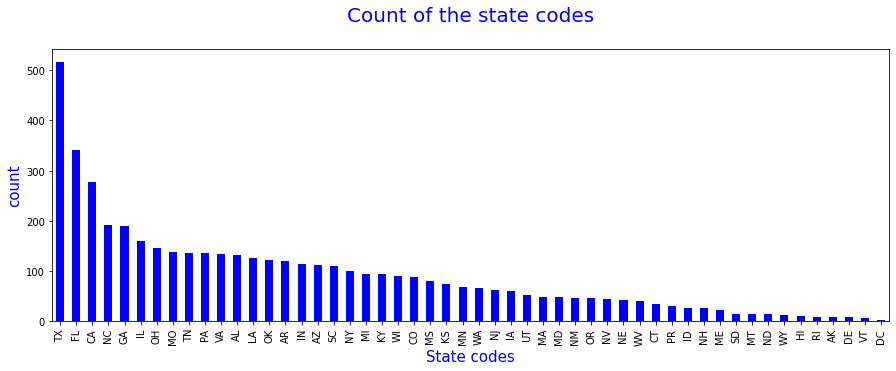

In [ ]:
state=walmart['State'].value_counts().plot.bar(color = 'blue', figsize = (15, 5))
plt.title('Count of the state codes\n',fontdict={'fontsize':20,'fontweight':5,'color':'Blue'})
plt.xlabel('State codes', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})
plt.ylabel('count', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})

Top 5 states where the Supercenters are mostly built is given below: 

*   Texas
*   Florida
*   California
*   North Carolina
*   Georgia

States that there is less stores is given below: 

*   District of Columbia
*   Vermont
*   Delaware
*   Alaska
*   Rhode Island






In [ ]:
walmart['Name'].value_counts()

San Antonio Supercenter             23
Houston Supercenter                 20
Jacksonville Supercenter            18
Orlando Neighborhood Market         14
Springfield Supercenter             14
                                    ..
Peru Supercenter                     1
Collinsville Neighborhood Market     1
Freeport Supercenter                 1
Morton Supercenter                   1
Gillette Supercenter                 1
Name: Name, Length: 3147, dtype: int64

Most of the supercenter are named in name of city names of US like: San Antonio Supercenter, Houston Supercentor, Jacksonville and Orlando.


In [ ]:
walmart['City'].value_counts()

San Antonio       29
Houston           26
Orlando           25
Jacksonville      24
Las Vegas         22
                  ..
Colby              1
Mcpherson          1
Crawfordsville     1
Brazil             1
Gillette           1
Name: City, Length: 2547, dtype: int64

The cities where supercenters are mostly seen are: San Antonio, Houston, Orlando, Jacksonville

In [ ]:
walmart['County'].value_counts()

Maricopa      60
Orange        60
Jefferson     55
Washington    49
Harris        47
              ..
Cheyenne       1
Winneshiek     1
Wapello        1
Muscatine      1
Haskell        1
Name: County, Length: 1243, dtype: int64

Stores are mostly bulit in these county of US:


*   Maricopa
*   Orange
*   Jefferson 
*   Washington



In [ ]:
walmart['Status'].value_counts()

Open               4663
Possibly Closed       3
Name: Status, dtype: int64

Text(0, 0.5, 'count')

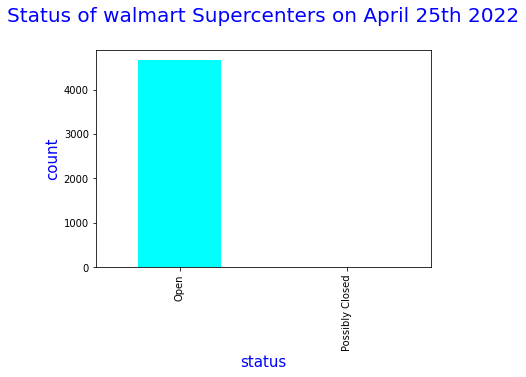

In [ ]:
Storestatus=walmart['Status'].value_counts().plot.bar(color = 'cyan')
plt.title('Status of walmart Supercenters on April 25th 2022\n',fontdict={'fontsize':20,'fontweight':5,'color':'Blue'})
plt.xlabel('status', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})
plt.ylabel('count', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})

while collecting information only 3 stores are possibly closed. balance all supercenter is still working in US.

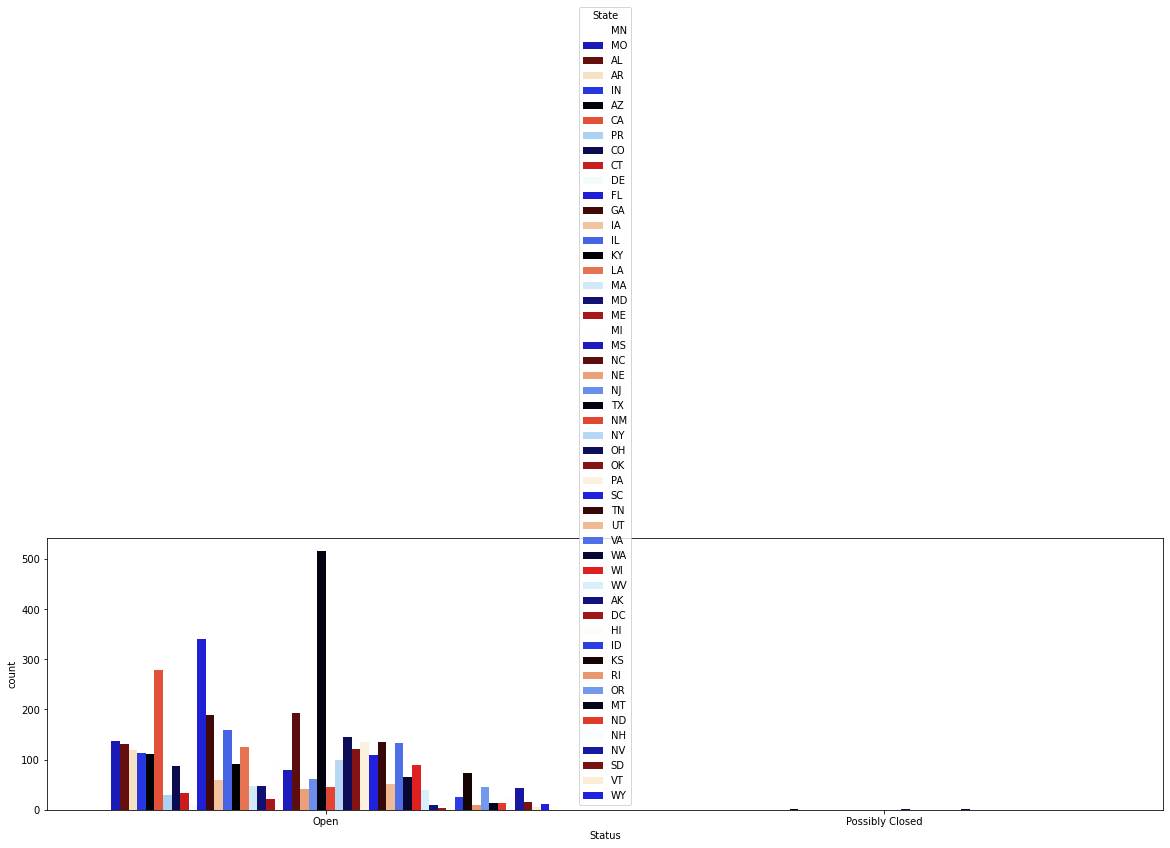

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x='Status', data=walmart, hue='State', palette='flag')

In [ ]:
#to check the stores which are Possibly closed.
Possibly_closed_stores=walmart.loc[walmart['Status'] == 'Possibly Closed']
Possibly_closed_stores

,Name,Latitude,Longitude,Street,City,State,County,Status,Sunday_Hours,Monday_Hours,Tuesday_Hours,Wednesday_Hours,Thursday_Hours,Friday_Hours,Saturday_Hours
174,Bellevue Store,47.572888,-122.172531,12620 Se 41st Pl,Bellevue,WA,King,Possibly Closed,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00
4664,Louisville Supercenter,38.171432,-85.870209,7100 Raggard Rd,Louisville,KY,Jefferson,Possibly Closed,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00
4665,Cincinnati Supercenter,39.296846,-84.518984,1143 Smiley Ave,Cincinnati,OH,Hamilton,Possibly Closed,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00,07:00 - 19:00


**These are the 3 walmart stores which is possibly closed:**


*   Bellevue Store	
*   Louisville Supercenter
*   Cincinnati Supercenter



In [ ]:
#these are the two continues variables of the data.latitude and longitude
#this information tells about the geographical location of stores.

walmart.describe()

,Latitude,Longitude
count,4666.000000,4666.000000
mean,36.451054,-91.538159
std,5.284875,13.693092
min,17.973966,-159.365025
25%,32.965483,-97.131349
50%,36.187974,-88.414395
75%,40.372891,-81.708958
max,64.856378,-65.644554


# **Inference From the Walmart data**

Walmart is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States. The details of the Walmart stores data are collected recently on April 25th 2022
•	Each store is having store number, and its name is given in the data
•	Address, street, city, state and zip code of the stores is given.

The data contains 4666 rows and 23 columns
Some of the column names are not in proper order, rearranged them by adding new names in a dictionary. Here the key will be old variable names and values in the dictionary is new name. There is no duplicate values in the data. We don’t need the address column in the data we can remove it. also we are removing the updated date column from the data, there is no much use with some of the variables of the data so we can remove those variables also. All the Stores having NAICS and SIC codes same, so we are going to eliminate those variables..
next we divided the Hours into separate columns. We filled the hours column by most repeated values. None of the data can be deleted, because the ratio is high. Mostly the data contain only categorical variable(Nominal)

Top 5 states where the Supercentres are mostly built is given below:\
**Texas, Florida, California, North Carolina, Georgia**

States that there is less stores is given below:\
**District of Columbia, Vermont, Delaware, Alaska, Rhode Island**

Most of the supercentre are named in name of city names of US like: San Antonio Supercentre, Houston Supercentre, Jacksonville and Orlando.\
The cities where supercentres are mostly seen are: San Antonio, Houston, Orlando, Jacksonville\
Stores are mostly built in these county of US:\
Maricopa, Orange, Jefferson, Washington

While collecting information only 3 stores are possibly closed. balance all supercentre is still working in US. These are the 3 Walmart stores which is possibly closed:\
**Bellevue Store, Louisville Supercentre, Cincinnati Supercentre**





## **The Kroger data Analysis..**

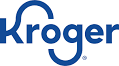
  




Kroger, is an American retail company that operates supermarkets and multi-department stores throughout the United States.This dataset is about the stores of Kroger company across US.

The details of the Kroger stores data are collected recently on April 18th 2022


*   Each store is having store number, and its name is given in the data
*   Address, street, city , state and zip code of the stores is given.
*   store open hours are given here.



In [ ]:
kroger=pd.read_csv('/content/Kroger_USA.csv.zip')
kroger.head(2)

,Store No.,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Open Hours,URL,Provider,Updated Date,Country,Status,Direction URL,Stock Ticker
0,2613055,Walgreens Pickup: Winston Ave Kroger,39.041550,-84.506668,"4299 Winston Ave, Latonia, KY, 41015",4299 Winston Ave,Latonia,KY,41015,Kenton,859-991-7483,sunday - saturday :- 9:00 am - 9:00 pm,https://www.kroger.com/stores/details/026/13055,Kroger,2022-04-18,USA,Open,https://www.google.com/maps/dir/Current+Locati...,KR:NYSE
1,49100660,Kroger Tempe,33.379424,-111.910917,"5100 S Mcclintock Dr, Tempe, AZ, 85282",5100 S Mcclintock Dr,Tempe,AZ,85282,Maricopa,NaN,sunday - saturday :- 24 hours,https://www.kroger.com/stores/details/491/00660,Kroger,2022-04-18,USA,Open,https://www.google.com/maps/dir/Current+Locati...,KR:NYSE


### **Analysis for Kroger Store data**

### Data Cleaning process

In [ ]:
kroger.columns

Index(['Store No.', 'Name', 'Latitude', 'Longitude', 'Address', 'Street',
       'City', 'State', 'Zip_Code', 'County', 'Phone', 'Open Hours', 'URL',
       'Provider', 'Updated Date', 'Country', 'Status', 'Direction URL',
       'Stock Ticker'],
      dtype='object')

**To arrange the column names**

In [ ]:
kroger.rename(columns= {'Store No.':'Store_No', 'Open Hours':'Open_Hours', 'Updated Date':'Updated_Date', 'Direction URL':'URL', 'Stock Ticker':'Stock_Ticker'}, inplace=True)

In [ ]:
kroger.head(2)

,Store_No,Name,Latitude,Longitude,Address,Street,City,State,Zip_Code,County,Phone,Open_Hours,URL,Provider,Updated_Date,Country,Status,URL,Stock_Ticker
0,2613055,Walgreens Pickup: Winston Ave Kroger,39.041550,-84.506668,"4299 Winston Ave, Latonia, KY, 41015",4299 Winston Ave,Latonia,KY,41015,Kenton,859-991-7483,sunday - saturday :- 9:00 am - 9:00 pm,https://www.kroger.com/stores/details/026/13055,Kroger,2022-04-18,USA,Open,https://www.google.com/maps/dir/Current+Locati...,KR:NYSE
1,49100660,Kroger Tempe,33.379424,-111.910917,"5100 S Mcclintock Dr, Tempe, AZ, 85282",5100 S Mcclintock Dr,Tempe,AZ,85282,Maricopa,NaN,sunday - saturday :- 24 hours,https://www.kroger.com/stores/details/491/00660,Kroger,2022-04-18,USA,Open,https://www.google.com/maps/dir/Current+Locati...,KR:NYSE


In [ ]:
kroger.shape

(1341, 19)

In kroger stores data their is 1341 rows and 19 columns

In [ ]:
kroger.duplicated().sum()

0

No duplicate recordes in the data.

In [ ]:
kroger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_No      1341 non-null   int64  
 1   Name          1341 non-null   object 
 2   Latitude      1341 non-null   float64
 3   Longitude     1341 non-null   float64
 4   Address       1341 non-null   object 
 5   Street        1341 non-null   object 
 6   City          1341 non-null   object 
 7   State         1341 non-null   object 
 8   Zip_Code      1341 non-null   int64  
 9   County        1341 non-null   object 
 10  Phone         1320 non-null   object 
 11  Open_Hours    1317 non-null   object 
 12  URL           1341 non-null   object 
 13  Provider      1341 non-null   object 
 14  Updated_Date  1341 non-null   object 
 15  Country       1341 non-null   object 
 16  Status        1341 non-null   object 
 17  URL           1341 non-null   object 
 18  Stock_Ticker  1341 non-null 

In [ ]:
kroger.isna().sum()

Store_No         0
Name             0
Latitude         0
Longitude        0
Address          0
Street           0
City             0
State            0
Zip_Code         0
County           0
Phone           21
Open_Hours      24
URL              0
Provider         0
Updated_Date     0
Country          0
Status           0
URL              0
Stock_Ticker     0
dtype: int64

Inside the data, In phone and open hours their is some null values, Phone variable is not needed for anlysis so we can drop it.

In [ ]:
kroger['Updated_Date'].value_counts()

2022-04-18    1341
Name: Updated_Date, dtype: int64

In [ ]:
#dropping these variables, beacuse no use with these data
kroger.drop(['Address','Updated_Date', 'Country','URL','Phone', 'Provider', 'Zip_Code', 'Store_No', 'Stock_Ticker'], axis=1, inplace=True)

In [ ]:
kroger.head(4)

,Name,Latitude,Longitude,Street,City,State,County,Open_Hours,Status
0,Walgreens Pickup: Winston Ave Kroger,39.041550,-84.506668,4299 Winston Ave,Latonia,KY,Kenton,sunday - saturday :- 9:00 am - 9:00 pm,Open
1,Kroger Tempe,33.379424,-111.910917,5100 S Mcclintock Dr,Tempe,AZ,Maricopa,sunday - saturday :- 24 hours,Open
2,Maumelle Kroger,34.847856,-92.408438,110 Commons Dr,Maumelle,AR,Pulaski,sunday - saturday :- 7:00 am - 11:00 pm,Open
3,W Memphis Kroger,35.167868,-90.191514,300 W Service Rd,West Memphis,AR,Crittenden,sunday - saturday :- 7:00 am - 10:00 pm,Open


**Here in next codes we are going to divide the hours**

In [ ]:
kroger.Open_Hours.head(11)

0      sunday - saturday :- 9:00 am - 9:00 pm
1               sunday - saturday :- 24 hours
2     sunday - saturday :- 7:00 am - 11:00 pm
3     sunday - saturday :- 7:00 am - 10:00 pm
4     sunday - saturday :- 6:00 am - 11:00 pm
5               sunday - saturday :- 24 hours
6     sunday - saturday :- 7:00 am - 11:00 pm
7               sunday - saturday :- 24 hours
8     sunday - saturday :- 7:00 am - 10:00 pm
9     sunday - saturday :- 8:00 am - 10:00 pm
10                                        NaN
Name: Open_Hours, dtype: object

In [ ]:
kroger['Open_Hours'].str.split('|')

0        [sunday - saturday :- 9:00 am - 9:00 pm]
1                 [sunday - saturday :- 24 hours]
2       [sunday - saturday :- 7:00 am - 11:00 pm]
3       [sunday - saturday :- 7:00 am - 10:00 pm]
4       [sunday - saturday :- 6:00 am - 11:00 pm]
                          ...                    
1336    [sunday - saturday :- 7:00 am - 11:00 pm]
1337    [sunday - saturday :- 7:00 am - 10:00 pm]
1338    [sunday - saturday :- 7:00 am - 10:00 pm]
1339    [sunday - saturday :- 7:00 am - 10:00 pm]
1340              [sunday - saturday :- 24 hours]
Name: Open_Hours, Length: 1341, dtype: object

In [ ]:
kroger['Hours']=kroger['Open_Hours'].str.split(':-').str[1]


In [ ]:
kroger.head(2)

,Name,Latitude,Longitude,Street,City,State,County,Open_Hours,Status,Hours
0,Walgreens Pickup: Winston Ave Kroger,39.041550,-84.506668,4299 Winston Ave,Latonia,KY,Kenton,sunday - saturday :- 9:00 am - 9:00 pm,Open,9:00 am - 9:00 pm
1,Kroger Tempe,33.379424,-111.910917,5100 S Mcclintock Dr,Tempe,AZ,Maricopa,sunday - saturday :- 24 hours,Open,24 hours


In [ ]:
kroger.columns

Index(['Name', 'Latitude', 'Longitude', 'Street', 'City', 'State', 'County',
       'Open_Hours', 'Status', 'Hours'],
      dtype='object')

In [ ]:
kroger.drop(['Open_Hours'], axis=1, inplace=True)

In [ ]:
kroger.head(2)

,Name,Latitude,Longitude,Street,City,State,County,Status,Hours
0,Walgreens Pickup: Winston Ave Kroger,39.041550,-84.506668,4299 Winston Ave,Latonia,KY,Kenton,Open,9:00 am - 9:00 pm
1,Kroger Tempe,33.379424,-111.910917,5100 S Mcclintock Dr,Tempe,AZ,Maricopa,Open,24 hours


In [ ]:
kroger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       1341 non-null   object 
 1   Latitude   1341 non-null   float64
 2   Longitude  1341 non-null   float64
 3   Street     1341 non-null   object 
 4   City       1341 non-null   object 
 5   State      1341 non-null   object 
 6   County     1341 non-null   object 
 7   Status     1341 non-null   object 
 8   Hours      1317 non-null   object 
dtypes: float64(2), object(7)
memory usage: 94.4+ KB


In [ ]:
kroger.isnull().sum()

Name          0
Latitude      0
Longitude     0
Street        0
City          0
State         0
County        0
Status        0
Hours        24
dtype: int64

**inside this data their is null values in Hours of each day so by checking the percentage we need to fill the hours to clean the data**..\
 

In [ ]:
kroger.Hours.value_counts()

 6:00 am - 11:00 pm                         402
 7:00 am - 10:00 pm                         316
 6:00 am - 10:00 pm                         234
 7:00 am - 11:00 pm                         132
 6:00 am - 1:00 am                           93
 6:00 am - 12:00 am                          32
 24 hours                                    30
 8:00 am - 10:00 pm                          27
 7:00 am - 9:00 pm                           25
 8:00 am - 10:00 pm | monday - saturday       4
 8:00 am - 12:00 am                           3
 7:00 am - 12:00 am                           3
 5:00 am - 11:00 pm                           2
 closed | monday - friday                     2
 6:00 am - 9:00 pm                            2
 8:00 am - 8:00 pm                            1
 8:00 am - 11:00 pm                           1
 9:00 am - 7:00 pm | monday - saturday        1
 8:00 am - 9:00 pm                            1
 9:00 am - 9:00 pm                            1
 6:00 am - 12:00 am | monday - saturday 

In [ ]:
kroger.Hours

0         9:00 am - 9:00 pm
1                  24 hours
2        7:00 am - 11:00 pm
3        7:00 am - 10:00 pm
4        6:00 am - 11:00 pm
               ...         
1336     7:00 am - 11:00 pm
1337     7:00 am - 10:00 pm
1338     7:00 am - 10:00 pm
1339     7:00 am - 10:00 pm
1340               24 hours
Name: Hours, Length: 1341, dtype: object

In [ ]:
#filling Thursday Hours

100*(kroger.Hours.isnull().sum()/kroger.shape[0])
#the ratio of null values is high in Hours variable,so we need to replace null values by most repeated value

1.7897091722595078

In [ ]:
kroger.Hours.mode()

0     6:00 am - 11:00 pm
dtype: object

In [ ]:
Hours_mode=kroger.Hours.mode()
Hours_mode

0     6:00 am - 11:00 pm
dtype: object

In [ ]:
Hours_mode[0]

' 6:00 am - 11:00 pm'

In [ ]:
kroger.Hours.fillna(Hours_mode[0],inplace=True)
kroger.Hours.value_counts(normalize=True)

 6:00 am - 11:00 pm                         0.317673
 7:00 am - 10:00 pm                         0.235645
 6:00 am - 10:00 pm                         0.174497
 7:00 am - 11:00 pm                         0.098434
 6:00 am - 1:00 am                          0.069351
 6:00 am - 12:00 am                         0.023863
 24 hours                                   0.022371
 8:00 am - 10:00 pm                         0.020134
 7:00 am - 9:00 pm                          0.018643
 8:00 am - 10:00 pm | monday - saturday     0.002983
 8:00 am - 12:00 am                         0.002237
 7:00 am - 12:00 am                         0.002237
 5:00 am - 11:00 pm                         0.001491
 closed | monday - friday                   0.001491
 6:00 am - 9:00 pm                          0.001491
 8:00 am - 8:00 pm                          0.000746
 8:00 am - 11:00 pm                         0.000746
 9:00 am - 7:00 pm | monday - saturday      0.000746
 8:00 am - 9:00 pm                          0.

In [ ]:
kroger.Hours.isnull().sum()

0

## Data Analysis and Visualization in Kroger Data

In [ ]:
kroger['Name'].value_counts()

Kroger Marketplace                         13
Kroger                                     12
Kroger Atlanta                              3
Springfield Kroger                          3
Oakland Kroger                              3
                                           ..
Latonia Kroger                              1
I-471 Memorial Pkwy Carothers Rd Kroger     1
Maysville Kroger                            1
Parkway Sc Kroger                           1
Hinton Fuel Kroger                          1
Name: Name, Length: 1269, dtype: int64

Most of the kroger store names are.
*   Kroger Marketplace   
*   Kroger  

In [ ]:
kroger['State'].value_counts()

OH    211
TX    209
GA    168
TN    154
KY    133
MI    122
IN    107
VA     69
WV     43
IL     31
MS     30
AR     27
SC     13
AL     10
LA      8
MO      3
AZ      2
FL      1
Name: State, dtype: int64

Text(0, 0.5, 'count')

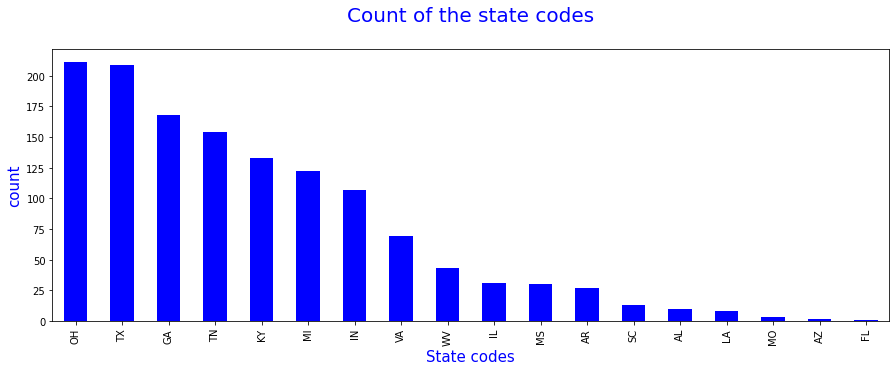

In [ ]:
state=kroger['State'].value_counts().plot.bar(color = 'blue', figsize = (15, 5))
plt.title('Count of the state codes\n',fontdict={'fontsize':20,'fontweight':5,'color':'Blue'})
plt.xlabel('State codes', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})
plt.ylabel('count', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})

Most of the kroger stores are located in these states.
*   	Ohio
*     Texas
*     Georgia
*     Tennessee
*     Kentucky

Least Kroger stores are in these states:
*    Florida
*    Arizona
*    Missouri
*    Louisiana
*    Alabama

In [ ]:
kroger['County'].value_counts()

Harris        63
Franklin      44
Hamilton      40
Montgomery    35
Jefferson     33
              ..
Meade          1
Powell         1
Boyle          1
Rowan          1
Upshur         1
Name: County, Length: 281, dtype: int64

Stores are mostly bulit in these county of US:


*   Harris
*   Franklin
*   Hamilton
*   Montgomery

In [ ]:
kroger['Status'].value_counts()

Open    1341
Name: Status, dtype: int64

All the stores of kroger company is still open till 18th april 2022

Text(0, 0.5, 'count')

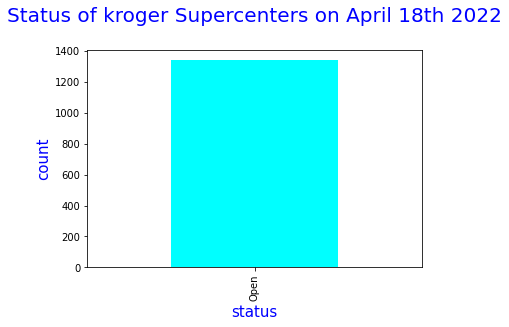

In [ ]:
Storestatus=kroger['Status'].value_counts().plot.bar(color = 'cyan')
plt.title('Status of kroger Supercenters on April 18th 2022\n',fontdict={'fontsize':20,'fontweight':5,'color':'Blue'})
plt.xlabel('status', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})
plt.ylabel('count', fontdict={'fontsize':15,'fontweight':5,'color':'Blue'})

In [ ]:
kroger.describe()

,Latitude,Longitude
count,1341.000000,1341.000000
mean,36.798331,-86.418126
std,3.655962,5.087295
min,28.637873,-111.910917
25%,33.855093,-88.718981
50%,37.271869,-84.530927
75%,39.705857,-83.545016
max,43.624561,-76.028079


# **Inference from Kroger Data**

Kroger, is an American retail company that operates supermarkets and multi-department stores throughout the United States. This dataset is about the stores of Kroger company across US. The details of the Kroger stores data are collected recently on April 18th 2022
•	Each store is having store number, and its name is given in the data
•	Address, street, city, state and zip code of the stores is given.
•	store open hours are given here.
In Kroger stores data there is 1341 rows and 19 columns. No duplicate recordes in the data.
Inside the data, in phone and open hours there is some null values, Phone variable is not needed for analysis so we can drop it. inside this data there is null values in Hours of each day so by checking the percentage we need to fill the hours to clean the data..
Most of the Kroger store names are.
**Kroger Marketplace, Kroger**

Most of the Kroger stores are located in these states.
**Ohio, Texas, Georgia, Tennessee, Kentucky**

Least Kroger stores are in these states:

**Florida, Arizona, Missouri, Louisiana, Alabama** 

Stores are mostly built in these county of US:

**Harris, Franklin, Hamilton, Montgomery**

All the stores of Kroger company is still open till 18th April 2022


# ***conclusion***

Walmart superstores are most in US than Kroger Superstores\
Kroger stores are all Marketplace and Walmart stores are supercentres
